# COVID-19 Dataset
https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not. 

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- `sex`: 1 for female and 2 for male.
- `age`: of the patient.
- `classification`: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- `patient` type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- `pneumonia`: whether the patient already have air sacs inflammation or not.
- `pregnancy`: whether the patient is pregnant or not.
- `diabetes`: whether the patient has diabetes or not.
- `copd`: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- `asthma`: whether the patient has asthma or not.
- `inmsupr`: whether the patient is immunosuppressed or not.
- `hypertension`: whether the patient has hypertension or not.
- `cardiovascular`: whether the patient has heart or blood vessels related disease.
- `renal chronic`: whether the patient has chronic renal disease or not.
- `other disease`: whether the patient has other disease or not.
- `obesity`: whether the patient is obese or not.
- `tobacco`: whether the patient is a tobacco user.
- `usmr`: Indicates whether the patient treated medical units of the first, second or third level.
- `medical` unit: type of institution of the National Health System that provided the care.
- `intubed`: whether the patient was connected to the ventilator.
- `icu`: Indicates whether the patient had been admitted to an Intensive Care Unit.
- `date died`: If the patient died indicate the date of death, and 9999-99-99 otherwise.

CONSIDERATIONS: 
- This dataset doesn't contain a target column. You have to generate the target column considering the people that died or not (field `date died`)
- The dataset maybe it's unbalance. Have this into consideration for your analysis
- This dataset is quite big - maybe you want to use a subsample of the data for the visualizations, same as we did in the California Housing
- Don't forget to try all the models that we learned in class, try different hyper

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [41]:
df = pd.read_csv('00-Covid-Data.csv')
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,2,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2


# Análisis exploratorio

In [42]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

No tenemos datos nulos como tal, los datos desconocidoslos tenemos nombrados como 97  y 99.

### Desbalanceo de las clases

Para este caso sustituiremos la columna de la fecha de la muerte para utilizarla como variable objetivo, teniendo en cuenta si murieron o no.

In [44]:
df = df.replace('9999-99-99', 2)
df.head(7)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,2,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,2,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97


In [45]:
for i in range(0, df.values.__len__() - 1):
    if df['DATE_DIED'].values[i] != 2:
        df['DATE_DIED'].values[i] = 1
df.head(7)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,1,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,1,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,2,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,2,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97


In [46]:
df['DIED'] = df['DATE_DIED']
df.drop('DATE_DIED', axis=1, inplace=True)
df.head(7)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,1
5,2,1,1,2,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2,2
6,2,1,1,1,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97,2


In [47]:
df['DIED'].value_counts()

2    971633
1     76942
Name: DIED, dtype: int64

<AxesSubplot: xlabel='DIED', ylabel='count'>

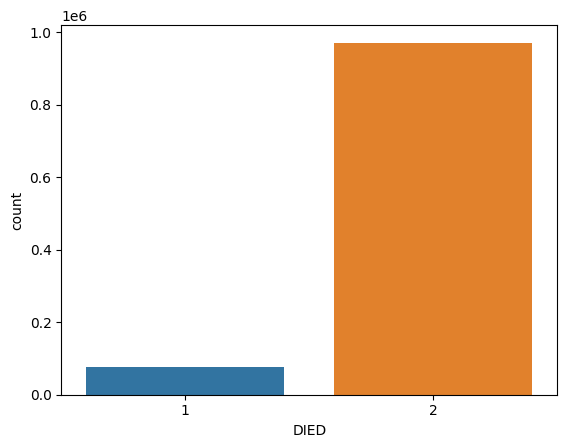

In [48]:
sns.countplot(x='DIED', data=df)

La cantidad de gente que no murió es mucho mayor a la que si lo hizo. Haremos undersampling para entrenar los modelos de forma eficiente.

## Exploración de las variables

<AxesSubplot: xlabel='AGE', ylabel='Density'>

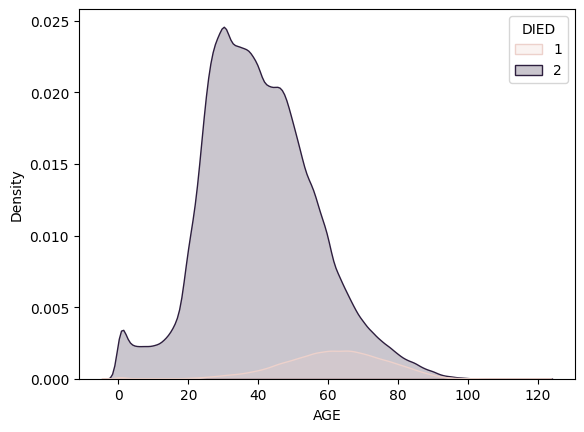

In [49]:
sns.kdeplot(data=df, x='AGE', hue='DIED', fill=True)

La gente que mas se contagiaba tenían entre 20-40 años, pero las que mas morían estaban entro los 50-80, a pesar de que se contagiaban menos.

<AxesSubplot: xlabel='SEX', ylabel='Density'>

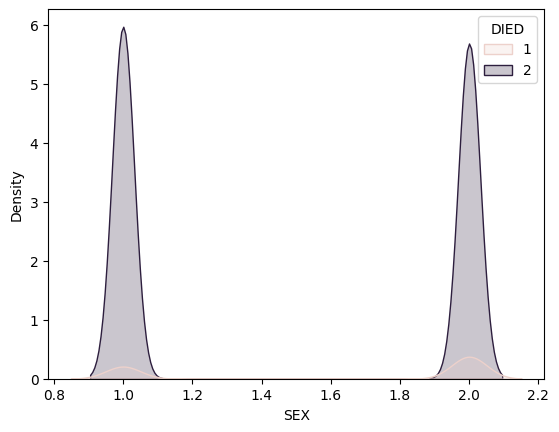

In [50]:
sns.kdeplot(data=df, x='SEX', hue='DIED', fill=True)

La cantidad de hombres que se contagiaron fue menor, pero aún así fueron los que más murieron.

<AxesSubplot: xlabel='DIABETES', ylabel='count'>

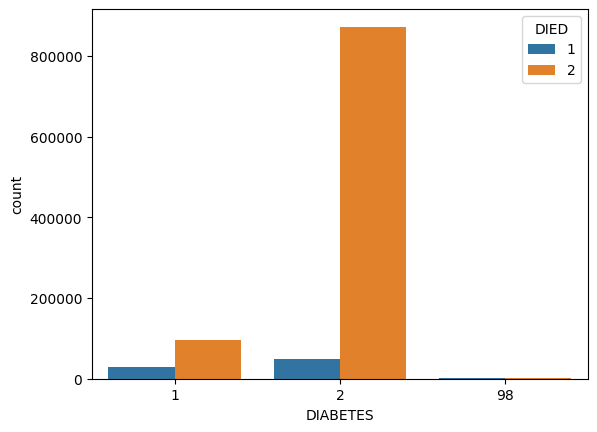

In [51]:
sns.countplot(x='DIABETES', hue= 'DIED', data=df)

<AxesSubplot: xlabel='ASTHMA', ylabel='count'>

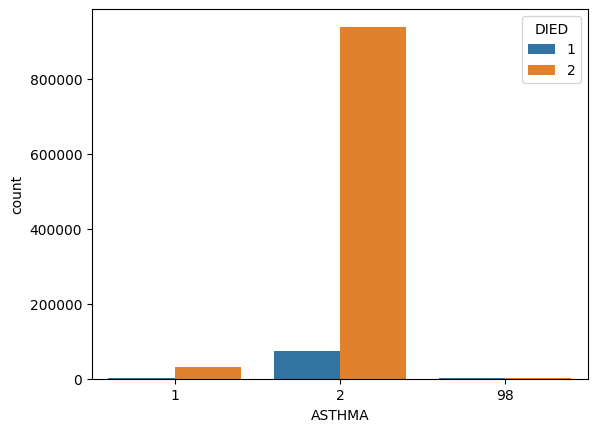

In [52]:
sns.countplot(x='ASTHMA', hue= 'DIED', data=df)

Viendo estos dos gráficos, vemos que fue más relevantes en la mortalidad si el paciente padecía diabates que si padecía asma.

<AxesSubplot: xlabel='TOBACCO', ylabel='count'>

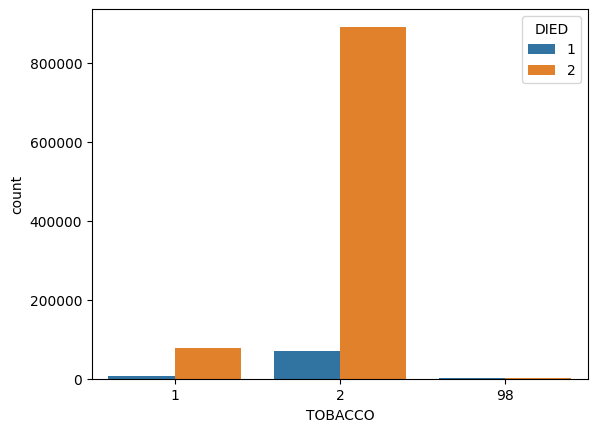

In [53]:
sns.countplot(x='TOBACCO', hue= 'DIED', data=df)

A pesar de que insistían tanto con el tema de no fumar por el Covid, vemos que no era tan importarte como el no tener diabetes.

<AxesSubplot: xlabel='INTUBED', ylabel='count'>

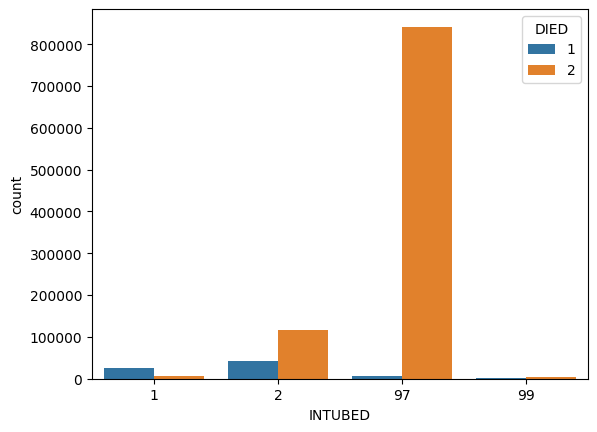

In [54]:
sns.countplot(x='INTUBED', hue= 'DIED', data=df)

Si llegaban al punto de tener que intubarlos, era más probable que murieran a que sobrevivieran.

## Preprocesamiento de los datos

Tenemos muchas más muestras gente que no murió que de muestras de gente que sí lo hizo, vamos a hacer undersampling quitando filas aleatorias que tengan como dato que el paciente no murió.

<AxesSubplot: xlabel='DIED', ylabel='count'>

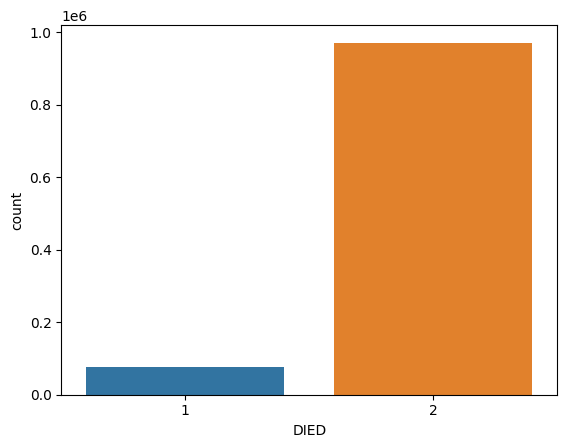

In [55]:
sns.countplot(x='DIED', data=df)

In [56]:
# grouped = df.groupby(df.DIED)
# df_died = grouped.get_group(2)
# df_alive = grouped.get_group(1)

In [57]:
# rng = np.random.RandomState(0)
# indices = rng.choice(np.arange(len(df_died)), size=100000, replace=False)
# df_short = df_died.iloc[indices]
# df_short

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
310388,1,4,1,1,97,2,37,2,2,2,2,2,2,2,2,2,2,2,7,97,2
756480,2,12,1,1,97,2,25,2,2,2,2,2,2,2,2,2,2,2,7,97,2
627261,2,12,1,1,97,2,46,2,2,2,2,2,2,2,2,2,2,2,3,97,2
312464,2,4,2,1,97,2,38,97,2,2,2,2,2,2,2,2,2,1,7,97,2
967580,2,12,1,1,97,2,49,2,2,2,2,2,2,2,2,2,2,2,7,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99253,1,4,2,1,97,2,31,97,2,2,2,2,2,2,2,1,2,2,3,97,2
878152,2,12,2,1,97,2,34,97,2,2,2,2,2,2,2,2,2,2,7,97,2
68754,1,4,1,1,97,2,33,2,1,2,2,2,2,2,2,1,2,2,3,97,2
424530,2,9,1,1,97,2,49,2,2,2,2,2,2,2,2,2,2,2,7,97,2


In [58]:
# new_df = pd.concat([df_short, df_alive])
# new_df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
310388,1,4,1,1,97,2,37,2,2,2,2,2,2,2,2,2,2,2,7,97,2
756480,2,12,1,1,97,2,25,2,2,2,2,2,2,2,2,2,2,2,7,97,2
627261,2,12,1,1,97,2,46,2,2,2,2,2,2,2,2,2,2,2,3,97,2
312464,2,4,2,1,97,2,38,97,2,2,2,2,2,2,2,2,2,1,7,97,2
967580,2,12,1,1,97,2,49,2,2,2,2,2,2,2,2,2,2,2,7,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,1,1,73,97,2,2,2,2,1,2,2,1,2,2,3,2,1
1047636,1,13,2,1,97,1,82,97,2,1,2,2,1,2,2,2,2,2,3,97,1
1047637,1,13,1,1,97,1,82,2,2,2,2,2,2,2,2,2,2,2,3,97,1
1047638,1,13,2,2,1,1,80,97,2,2,2,2,2,2,2,1,2,2,3,2,1


In [59]:
new_df['DIED'].value_counts()

2    100000
1     76942
Name: DIED, dtype: int64

<AxesSubplot: xlabel='DIED', ylabel='count'>

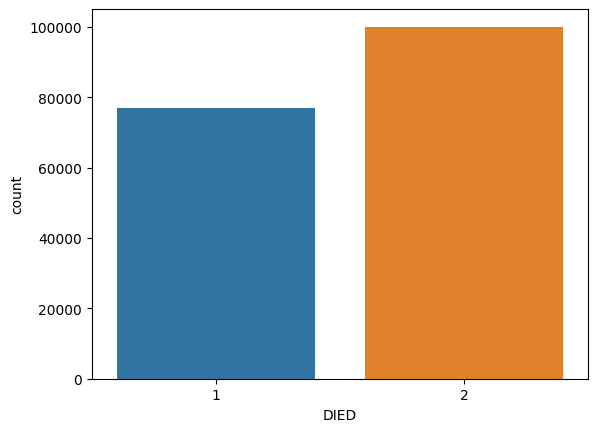

In [60]:
sns.countplot(x='DIED', data=new_df)

Con el método de undersampling, quitamos algunas muestras de la gente que no murió, pero dejando una cantidad mayor, ya que la tendencia nos dice que sobrevivirán más de las que morirán.

### Correlación de variables

/tmp/ipykernel_10420/3271924099.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

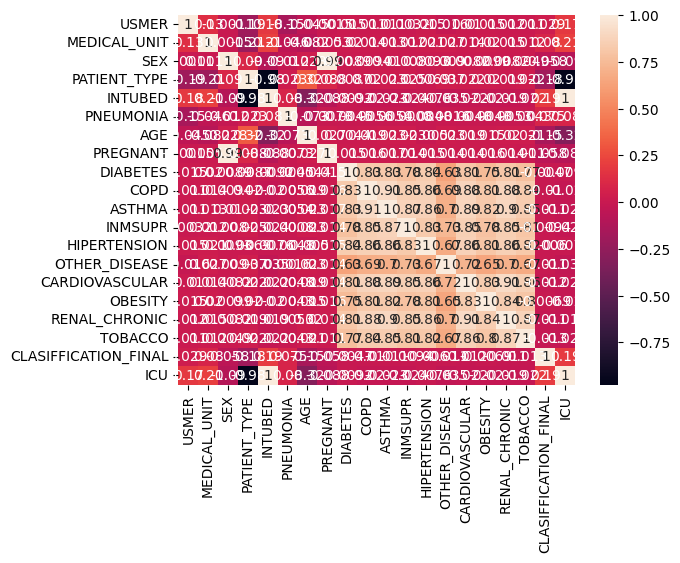

In [61]:
corr = df.corr()
sns.heatmap(corr, annot=True, cbar=True)

Podemos observar un cuadrado de correlaciones elevadas, veámoslo más en detalle.

In [62]:
labels = ["USMER","MEDICAL_UNIT", "SEX", "PATIENT_TYPE", "INTUBED", 
          "PNEUMONIA", "AGE", "PREGNANT", "CLASIFFICATION_FINAL", "ICU"]
corr_df = df.drop(labels=labels, axis=1)


/tmp/ipykernel_10420/1791093083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_df.corr()


<AxesSubplot: >

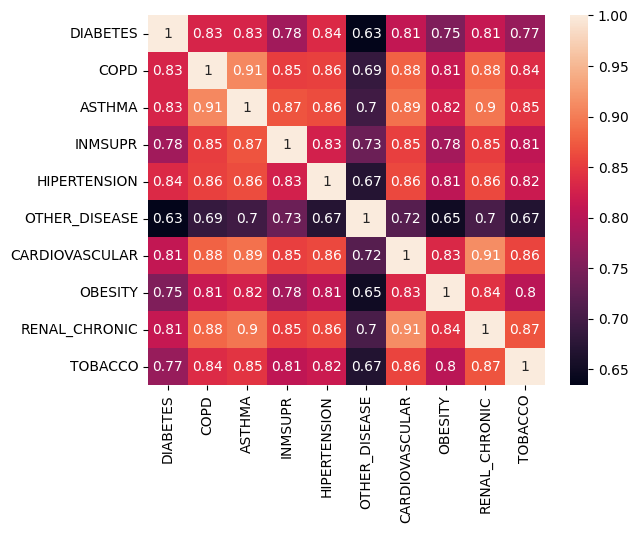

In [63]:
corr = corr_df.corr()
sns.heatmap(corr, annot=True, cbar=True)

Aun no tratándose de un dataset de estas enfermedad concretas, podemos ver la correlación que tienen entre ellas y qué efecto tuvieron en las muertes de Covid. Por ejemplo, la gente con diabetes vimos que tenían peligro de mortalidad y aquí vemos que el asma está muy relacionado con la diabetes, habrá que prestar atención a la gente con asma.

## Entrenamiento de los modelos

In [64]:
from sklearn.model_selection import train_test_split

X = new_df.drop('DIED', axis=1)
y = new_df.DIED
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Regresión Logística

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def show_metrics(clf, y_test, y_pred):
    print(f'Accuracy score: {int(accuracy_score(y_test, y_pred)*100)}%\n')
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()

/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Accuracy score: 88%

              precision    recall  f1-score   support

           1       0.86      0.89      0.88     23250
           2       0.91      0.89      0.90     29833

    accuracy                           0.89     53083
   macro avg       0.89      0.89      0.89     53083
weighted avg       0.89      0.89      0.89     53083



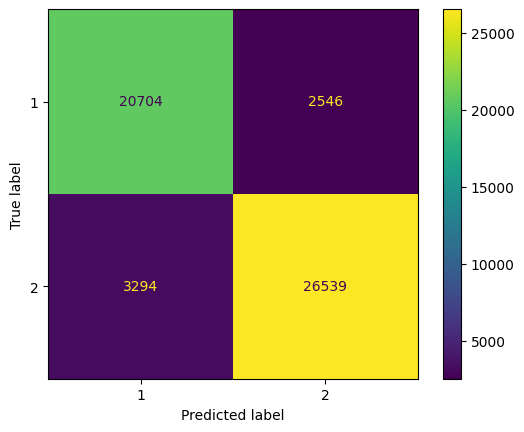

Accuracy score: 88%

              precision    recall  f1-score   support

           1       0.86      0.89      0.88     23250
           2       0.91      0.89      0.90     29833

    accuracy                           0.89     53083
   macro avg       0.89      0.89      0.89     53083
weighted avg       0.89      0.89      0.89     53083



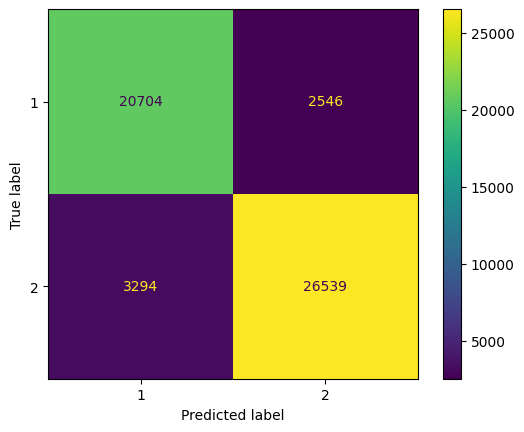

/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 88%

              precision    recall  f1-score   support

           1       0.86      0.88      0.87     23250
           2       0.90      0.89      0.90     29833

    accuracy                           0.88     53083
   macro avg       0.88      0.88      0.88     53083
weighted avg       0.88      0.88      0.88     53083



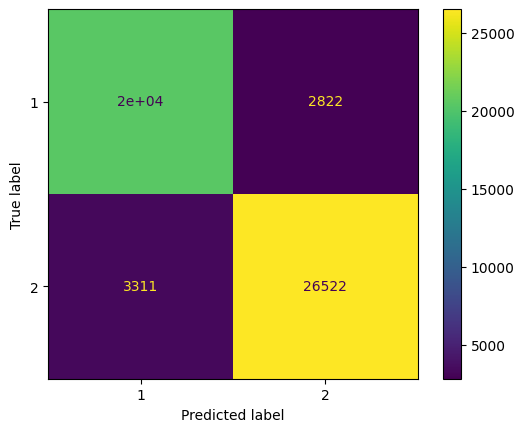

Accuracy score: 89%

              precision    recall  f1-score   support

           1       0.86      0.89      0.88     23250
           2       0.91      0.89      0.90     29833

    accuracy                           0.89     53083
   macro avg       0.89      0.89      0.89     53083
weighted avg       0.89      0.89      0.89     53083



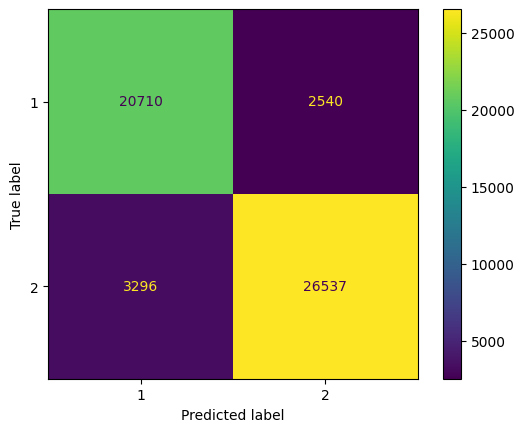

/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy score: 88%

              precision    recall  f1-score   support

           1       0.86      0.88      0.87     23250
           2       0.91      0.89      0.90     29833

    accuracy                           0.89     53083
   macro avg       0.88      0.89      0.88     53083
weighted avg       0.89      0.89      0.89     53083



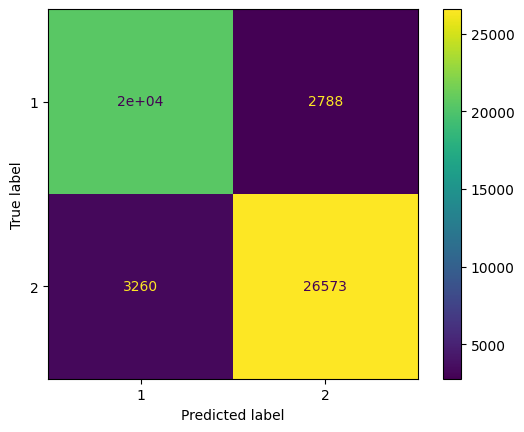

/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy score: 88%

              precision    recall  f1-score   support

           1       0.86      0.88      0.87     23250
           2       0.90      0.89      0.90     29833

    accuracy                           0.88     53083
   macro avg       0.88      0.88      0.88     53083
weighted avg       0.89      0.88      0.88     53083



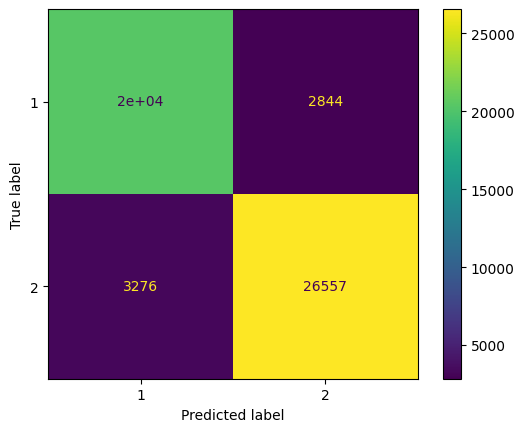

['newton-cg: 88%', 'newton-cholesky: 88%', 'lbfgs: 88%', 'liblinear: 89%', 'sag: 88%', 'saga: 88%']


In [66]:
from sklearn.linear_model import LogisticRegression

solvers = ['newton-cg', 'newton-cholesky','lbfgs', 'liblinear', 'sag', 'saga']
algorithm_accuracy = []
for solver in solvers:
    logreg = LogisticRegression(solver=solver, multi_class='auto')
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)

    show_metrics(logreg, y_test, y_pred)
    algorithm_accuracy.append(f'{solver}: {int(accuracy_score(y_test, y_pred)*100)}%')
print(algorithm_accuracy)

#### Grid search

In [67]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'warn']
}

# Create a based model
rf = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[CV] END .....................multi_class=auto, solver=lbfgs; total time=   1.9s
[CV] END .....................multi_class=auto, solver=lbfgs; total time=   2.0s


/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................multi_class=auto, solver=lbfgs; total time=   3.2s


/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV] END .................multi_class=auto, solver=newton-cg; total time=   9.9s
[CV] END .................multi_class=warn, solver=newton-cg; total time=   0.0s
[CV] END .................multi_class=warn, solver=newton-cg; total time=   0.0s
[CV] END .................multi_class=warn, solver=newton-cg; total time=   0.0s
[CV] END .....................multi_class=warn, solver=lbfgs; total time=   0.0s
[CV] END .....................multi_class=warn, solver=lbfgs; total time=   0.0s
[CV] END .......................multi_class=auto, solver=sag; total time=  10.0s
[CV] END .....................multi_class=warn, solver=lbfgs; total time=   0.0s
[CV] END .................multi_class=warn, solver=liblinear; total time=   0.0s
[CV] END .................multi_class=warn, solver=liblinear; total time=   0.0s
[CV] END .................multi_class=warn, solver=liblinear; total time=   0.0s


/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................multi_class=warn, solver=sag; total time=   0.0s
[CV] END .......................multi_class=warn, solver=sag; total time=   0.0s
[CV] END .......................multi_class=warn, solver=sag; total time=   0.0s
[CV] END ......................multi_class=warn, solver=saga; total time=   0.0s
[CV] END ......................multi_class=warn, solver=saga; total time=   0.0s
[CV] END ......................multi_class=warn, solver=saga; total time=   0.0s


/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................multi_class=auto, solver=sag; total time=  10.6s
[CV] END .......................multi_class=auto, solver=sag; total time=  10.6s
[CV] END .................multi_class=auto, solver=newton-cg; total time=  11.4s
[CV] END .................multi_class=auto, solver=newton-cg; total time=  11.8s
[CV] END ......................multi_class=auto, solver=saga; total time=   9.9s


/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................multi_class=auto, solver=saga; total time=  10.1s
[CV] END .................multi_class=auto, solver=liblinear; total time=  13.1s
[CV] END .................multi_class=auto, solver=liblinear; total time=  13.3s


/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................multi_class=auto, solver=saga; total time=  10.4s
[CV] END .................multi_class=auto, solver=liblinear; total time=  14.1s


/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/base.py", line 570, in _va

Best params: {'multi_class': 'auto', 'solver': 'newton-cg'}
Accuracy score:  
 0.8899836105721229
Confusion matrix: 
 [[20704  2546]
 [ 3294 26539]]


/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/salvi/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


### Naïve Bayes

Accuracy score: 87%

              precision    recall  f1-score   support

           1       0.85      0.88      0.86     23250
           2       0.90      0.88      0.89     29833

    accuracy                           0.88     53083
   macro avg       0.87      0.88      0.88     53083
weighted avg       0.88      0.88      0.88     53083



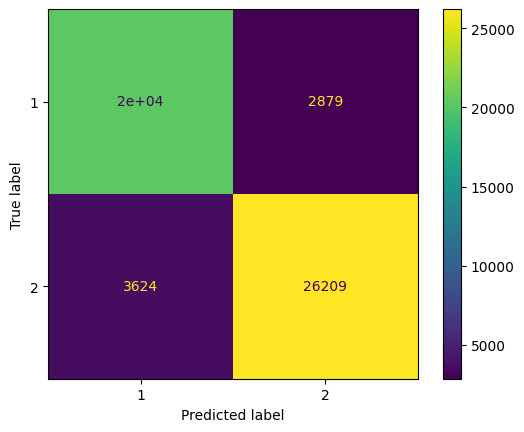

In [68]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
show_metrics(gaussian, y_test, y_pred)

algorithm_accuracy.append((gaussian, accuracy))

### Decision Tree

Accuracy score: 87%

              precision    recall  f1-score   support

           1       0.85      0.87      0.86     23250
           2       0.90      0.88      0.89     29833

    accuracy                           0.88     53083
   macro avg       0.88      0.88      0.88     53083
weighted avg       0.88      0.88      0.88     53083



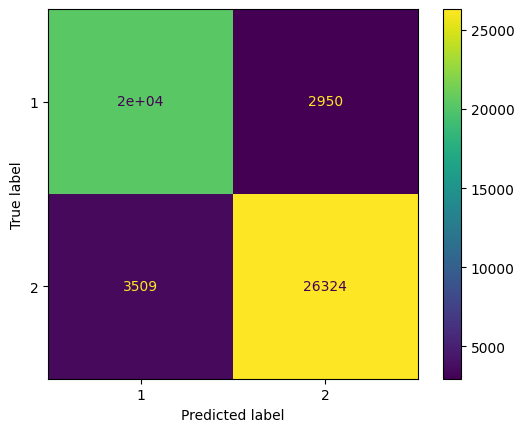

In [69]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)

show_metrics(decision_tree, y_test, y_pred)

#### Grid search

In [70]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_split': range(10,250,20),
    'max_depth': range(1,20,2),
}

# Create a based model
dt = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 2/3] END .max_depth=1, min_samples_split=10;, score=0.887 total time=   0.1s
[CV 1/3] END .max_depth=1, min_samples_split=10;, score=0.884 total time=   0.1s
[CV 3/3] END .max_depth=1, min_samples_split=10;, score=0.886 total time=   0.2s
[CV 1/3] END .max_depth=1, min_samples_split=30;, score=0.884 total time=   0.2s
[CV 1/3] END .max_depth=1, min_samples_split=50;, score=0.884 total time=   0.1s
[CV 2/3] END .max_depth=1, min_samples_split=30;, score=0.887 total time=   0.2s
[CV 3/3] END .max_depth=1, min_samples_split=30;, score=0.886 total time=   0.2s
[CV 2/3] END .max_depth=1, min_samples_split=50;, score=0.887 total time=   0.2s
[CV 3/3] END .max_depth=1, min_samples_split=50;, score=0.886 total time=   0.2s
[CV 1/3] END .max_depth=1, min_samples_split=70;, score=0.884 total time=   0.2s
[CV 1/3] END .max_depth=1, min_samples_split=90;, score=0.884 total time=   0.2s
[CV 3/3] END .max_depth=1, min_samples_split=7

### Random Forest

Accuracy score: 89%

              precision    recall  f1-score   support

           1       0.87      0.90      0.88     23250
           2       0.92      0.89      0.91     29833

    accuracy                           0.90     53083
   macro avg       0.89      0.90      0.90     53083
weighted avg       0.90      0.90      0.90     53083



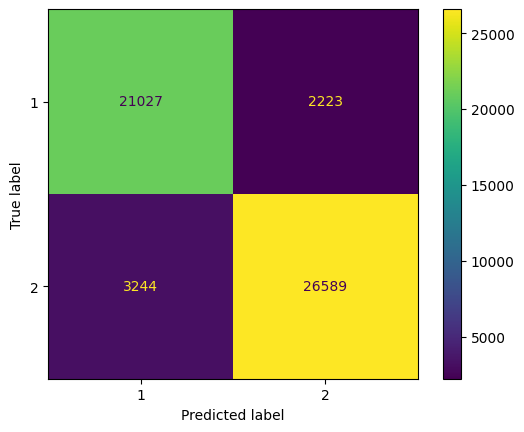

In [71]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

show_metrics(random_forest, y_test, y_pred)

#### Importancia de las Features

In [72]:
importances = pd.DataFrame(
    {'feature':df.drop("DIED", axis=1).columns,
     'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
PATIENT_TYPE,0.218
AGE,0.186
INTUBED,0.148
ICU,0.134
PNEUMONIA,0.126
MEDICAL_UNIT,0.040
CLASIFFICATION_FINAL,0.040
DIABETES,0.024
HIPERTENSION,0.017


<AxesSubplot: xlabel='feature'>

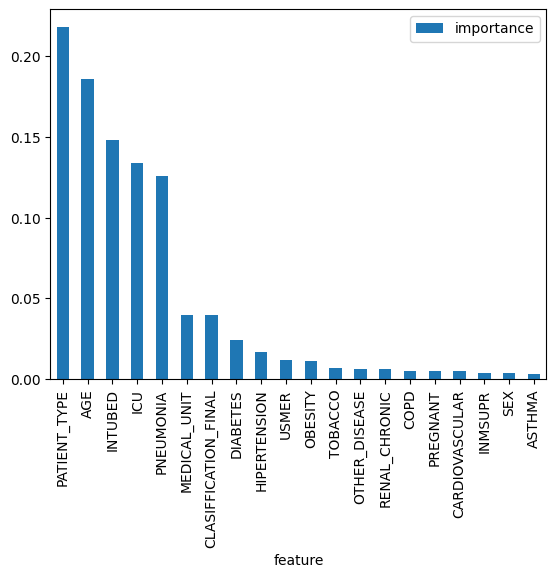

In [73]:
importances.plot.bar()

El tipo de paciente es muy relevante pues indicaba si se hospitalizó, y si llegaba a ese punto es que se trataba de un caso grave. El siguiente factor determinante es la edad, como vimos antes.

#### Grid search

In [74]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [50, 60, 70, 80],
    'max_features': [1, 2],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [25, 50, 75, 125]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=25; total time=   3.5s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=25; total time=   3.6s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=25; total time=   3.8s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   6.0s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=25; total time=   3.1s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=25; total time=   3.4s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=25; total time=   3.6s
[CV] END 

### Support Vector Machine

Accuracy score: 90%

              precision    recall  f1-score   support

           1       0.86      0.94      0.90     23250
           2       0.95      0.88      0.91     29833

    accuracy                           0.91     53083
   macro avg       0.91      0.91      0.91     53083
weighted avg       0.91      0.91      0.91     53083



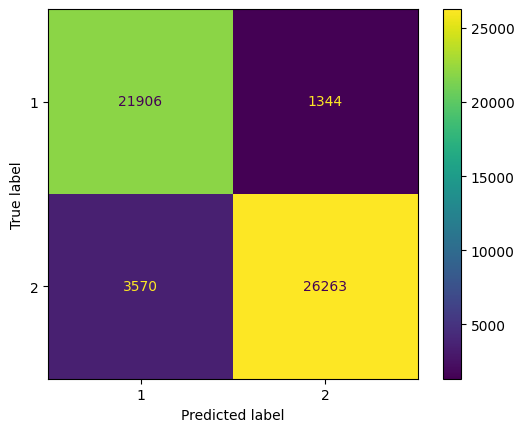

In [75]:
from sklearn.svm import SVC, LinearSVC

linear_svc = SVC(gamma='auto')
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

show_metrics(linear_svc, y_test, y_pred)

#### Grid search

In [76]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [0, 1, 2, 3, 4, 5, 6],
}
# Create a based model
svc = SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 420 candidates, totalling 1260 fits
[CV] END .........C=0.001, degree=0, gamma=0.001, kernel=rbf; total time=15.1min
[CV] END .........C=0.001, degree=0, gamma=0.001, kernel=rbf; total time=15.3min
[CV] END .........C=0.001, degree=0, gamma=0.001, kernel=rbf; total time=15.4min
[CV] END ........C=0.001, degree=0, gamma=0.001, kernel=poly; total time=15.6min
[CV] END ........C=0.001, degree=0, gamma=0.001, kernel=poly; total time=15.8min
[CV] END ........C=0.001, degree=0, gamma=0.001, kernel=poly; total time=15.8min
[CV] END .........C=0.001, degree=0, gamma=0.01, kernel=poly; total time=14.7min
[CV] END .........C=0.001, degree=0, gamma=0.01, kernel=poly; total time=14.8min
[CV] END .........C=0.001, degree=0, gamma=0.01, kernel=poly; total time=15.2min
[CV] END ..........C=0.001, degree=0, gamma=0.01, kernel=rbf; total time=18.3min
[CV] END ..........C=0.001, degree=0, gamma=0.01, kernel=rbf; total time=22.4min
[CV] END ..........C=0.001, degree=0, gamma=0

KeyboardInterrupt: 

### K Nearest Neighbors

Accuracy score: 89%

              precision    recall  f1-score   support

           1       0.87      0.90      0.88     23250
           2       0.92      0.89      0.91     29833

    accuracy                           0.90     53083
   macro avg       0.89      0.90      0.89     53083
weighted avg       0.90      0.90      0.90     53083



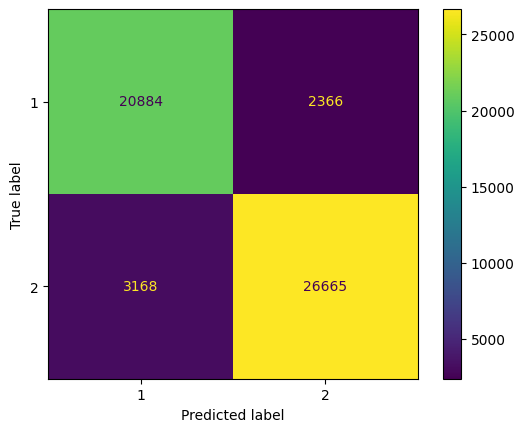

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

show_metrics(knn, y_test, y_pred)

#### Obteniendo el de valor de K

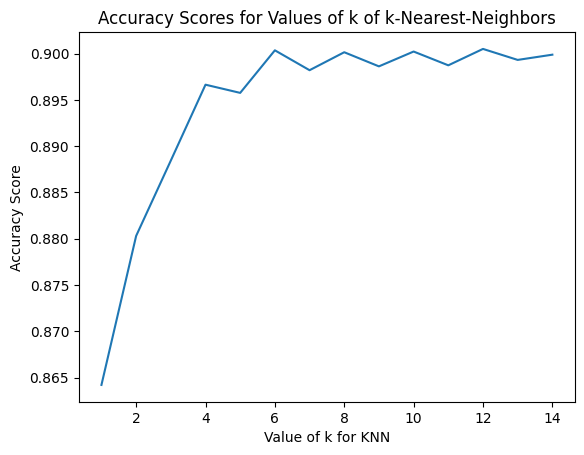

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# experimenting with different n values
k_range = list(range(1,15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

En esta ocasión el modelo que más accuracy consigue es el Support Vector Machine con un 90%.La mayoría de errores prediciendo dice que la gente sí va a morir, lo cual es mejor equivocarse diciendo que sí y luego realmente poder decirles que no van a morir. El caso contrario puede desencadenar más problemas tanto para la persona como para los profesionales que lo utilicen.

### Predicción

Con los modelos ya entrenados, utilizaremos el que mas accurancy tiene para intentar predecir qué pasará con un nuevo paciente que llegue con síntomas variados.

In [79]:
new_patient = {
    'USMER': 2,
    'MEDICAL_UNIT': 4,
    'SEX': 1,
    'PATIENT_TYPE': 1,
    'INTUBED': 1,
    'PNEUMONIA': 2,
    'AGE': 32,
    'PREGNANT': 97,
    'DIABETES': 97,
    'COPD': 2,
    'ASTHMA': 1,
    'INMSUPR': 1,
    'HIPERTENSION': 2,
    'OTHER_DISEASE': 2,
    'CARDIOVASCULAR': 2,
    'OBESITY': 1,
    'RENAL_CHRONIC': 2,
    'TOBACCO': 2,
    'CLASIFFICATION_TOTAL': 7,
    'ICU': 99,
}

new_patient_df = pd.DataFrame(np.array([list(new_patient.values())]), columns=X_train.columns)

predictions = linear_svc.predict(new_patient_df)  

if predictions[0] == 1:
    print("El paciente es muy probable que muera")
else:
    print("Es poco probable que el paciento muera")

El paciente es muy probable que muera
